In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
from matplotlib import pyplot

from datetime import datetime

In [2]:
cjdt = pd.read_excel \
('../../data/bigcontest/05_물류데이터(CJ올리브네트웍스)/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx')

In [3]:
cjdt['DL_YMD'] = pd.to_datetime(cjdt['DL_YMD'], format='%y%m%d')
cjdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156571 entries, 0 to 156570
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DL_YMD         156571 non-null  datetime64[ns]
 1   DL_GD_LCLS_NM  156571 non-null  object        
 2   DL_GD_LCLS_CD  156571 non-null  int64         
 3   CTPV_NM        156571 non-null  object        
 4   CTPV_CD        156571 non-null  int64         
 5   CTGG_NM        156571 non-null  object        
 6   CTGG_CD        156571 non-null  int64         
 7   HDNG_NM        156571 non-null  object        
 8   HDNG_CD        156571 non-null  int64         
 9   INVC_CONT      156571 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 11.9+ MB


In [4]:
cjdt['DL_Y'] = cjdt.DL_YMD.dt.year
cjdt['DL_W'] = cjdt.DL_YMD.dt.weekofyear

In [5]:
cjdt['CGNM']=cjdt['CTPV_NM'].map(str)+cjdt['CTGG_NM']
#cjdt.head()

2020년 8,9주차에 대구 수성구에서 급증한 카테고리 = 식품, 생활건강
* 2/18 신천지 31번 확진자 발생
* 2/19 코로나 첫 사망자. 경북 청도 대남병원
* 2/21 신규확진자 42명

* 3/9 서울 구로구 콜센터 집단감염
* 3/10 WTO 팬데믹 선언
* 3/18 대구 요양병원 5곳 87명 집단감염
* 4/19 고강도 사회적 거리두기 종료
* 5/5 사회적 거리두기 종료, 생활적 거리두기로 방역 전환

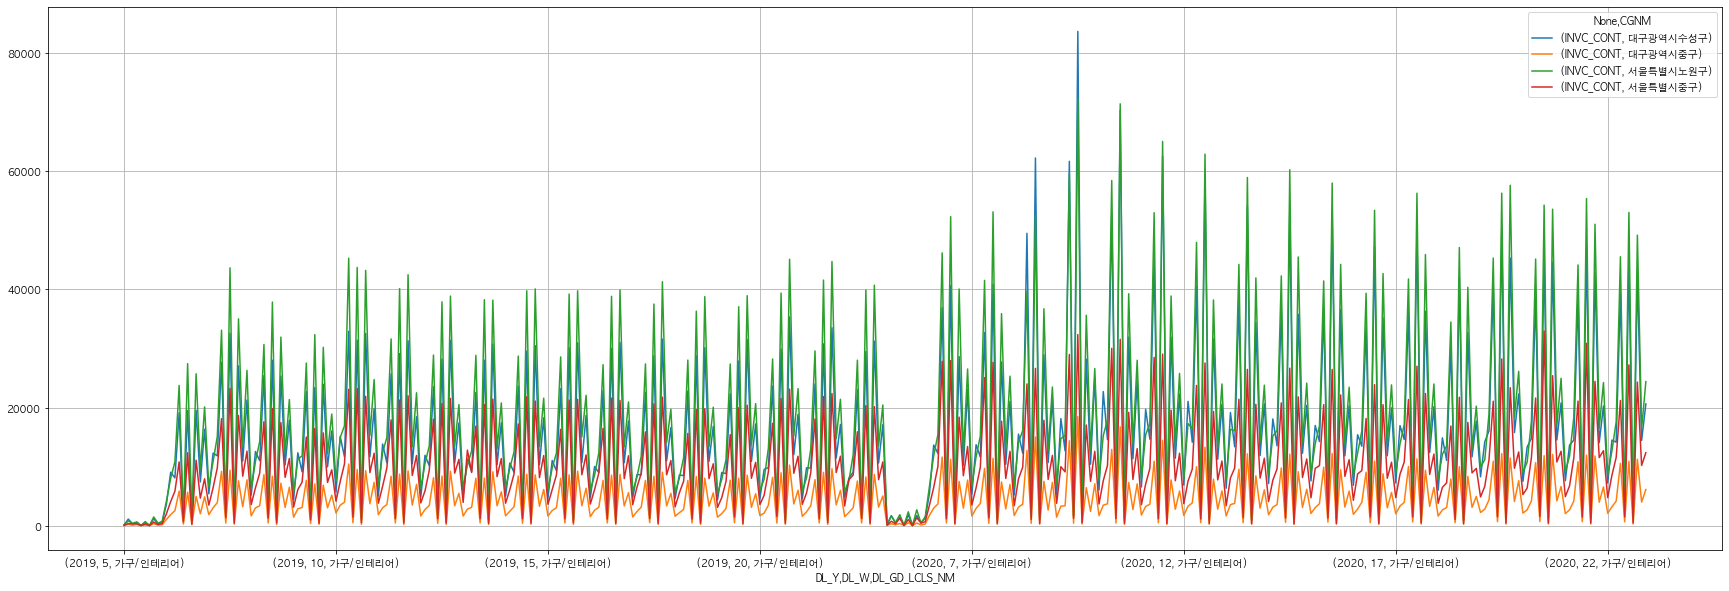

In [6]:
dt01=cjdt.pivot_table(values=['INVC_CONT'], \
                      columns='CGNM', \
                      index=['DL_Y','DL_W', 'DL_GD_LCLS_NM'], aggfunc='sum')
dt01
dt01.plot(figsize=(30,10), grid=True)

In [7]:
dt02=cjdt.pivot_table(values=['INVC_CONT'], \
                      columns='DL_Y', \
                      index=['DL_W', 'DL_GD_LCLS_NM'], aggfunc='sum')
dt02['diff']=dt02.iloc[:,1] - dt02.iloc[:,0]
dt02

INVC_CONT           diff
DL_Y                    2019    2020       
DL_W DL_GD_LCLS_NM                         
5    가구/인테리어             294     481    187
     도서/음반              2451    4342   1891
     디지털/가전             1040    1403    363
     생활건강               1696    4886   3190
     스포츠/레저               60     124     64
...                      ...     ...    ...
22   식품                97938  135633  37695
     출산/육아              2488    3131    643
     패션의류             100772  127069  26297
     패션잡화              35027   45018   9991
     화장품/미용            53321   63442  10121

[180 rows x 3 columns]

In [8]:
#dt02=cjdt.groupby(['DL_Y','DL_W','CGNM','DL_GD_LCLS_NM'],as_index=False)[['INVC_CONT']].sum()
#dt02

In [9]:
cjdt_seoul = cjdt[cjdt['CTPV_NM']=='서울특별시']
cjdt_daegu = cjdt[cjdt['CTPV_NM']=='대구광역시']
#서울/대구 주별/구별 1920 합계
dt03=cjdt_seoul.groupby(['DL_Y','DL_W','DL_GD_LCLS_NM','CGNM'],as_index=False)[['INVC_CONT']].sum()
dt04=cjdt_daegu.groupby(['DL_Y','DL_W','CGNM','DL_GD_LCLS_NM'],as_index=False)[['INVC_CONT']].sum()
dt05=cjdt_seoul.pivot_table(values=['INVC_CONT'], \
                      columns=['CGNM', 'DL_GD_LCLS_NM'], \
                      index=['DL_Y','DL_W'], aggfunc='sum')
dt06=cjdt_daegu.pivot_table(values=['INVC_CONT'], \
                      columns=['CGNM', 'DL_GD_LCLS_NM'], \
                      index=['DL_Y','DL_W'], aggfunc='sum')

In [10]:
cjdt_seoul_19=dt03[dt03['DL_Y']==2019]
cjdt_seoul_20=dt03[dt03['DL_Y']==2020]
cjdt_daegu_19=dt04[dt04['DL_Y']==2019]
cjdt_daegu_20=dt04[dt04['DL_Y']==2020]

In [11]:
cjdt_seoul.head()

,DL_YMD,DL_GD_LCLS_NM,DL_GD_LCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,HDNG_NM,HDNG_CD,INVC_CONT,DL_Y,DL_W,CGNM
0,2019-02-01,도서/음반,12,서울특별시,11,중구,14,동화동,665,16,2019,5,서울특별시중구
1,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,신당동,615,4,2019,5,서울특별시중구
5,2019-02-01,도서/음반,12,서울특별시,11,중구,14,회현동,540,25,2019,5,서울특별시중구
7,2019-02-01,디지털/가전,13,서울특별시,11,중구,14,황학동,670,14,2019,5,서울특별시중구
13,2019-02-01,가구/인테리어,10,서울특별시,11,중구,14,약수동,635,4,2019,5,서울특별시중구


# 서울 전체

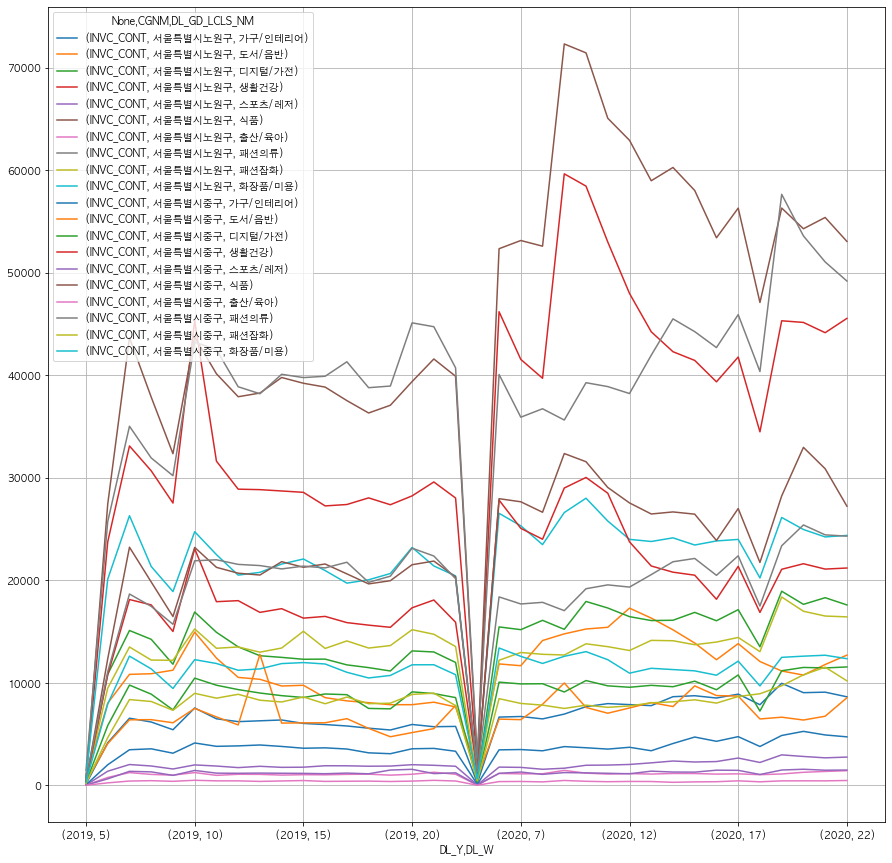

In [12]:
#전체
dt05.plot(figsize=(15,15),grid=True)

([<matplotlib.axis.XTick at 0x7faf25edffd0>,
 <a list of 18 Text major ticklabel objects>)

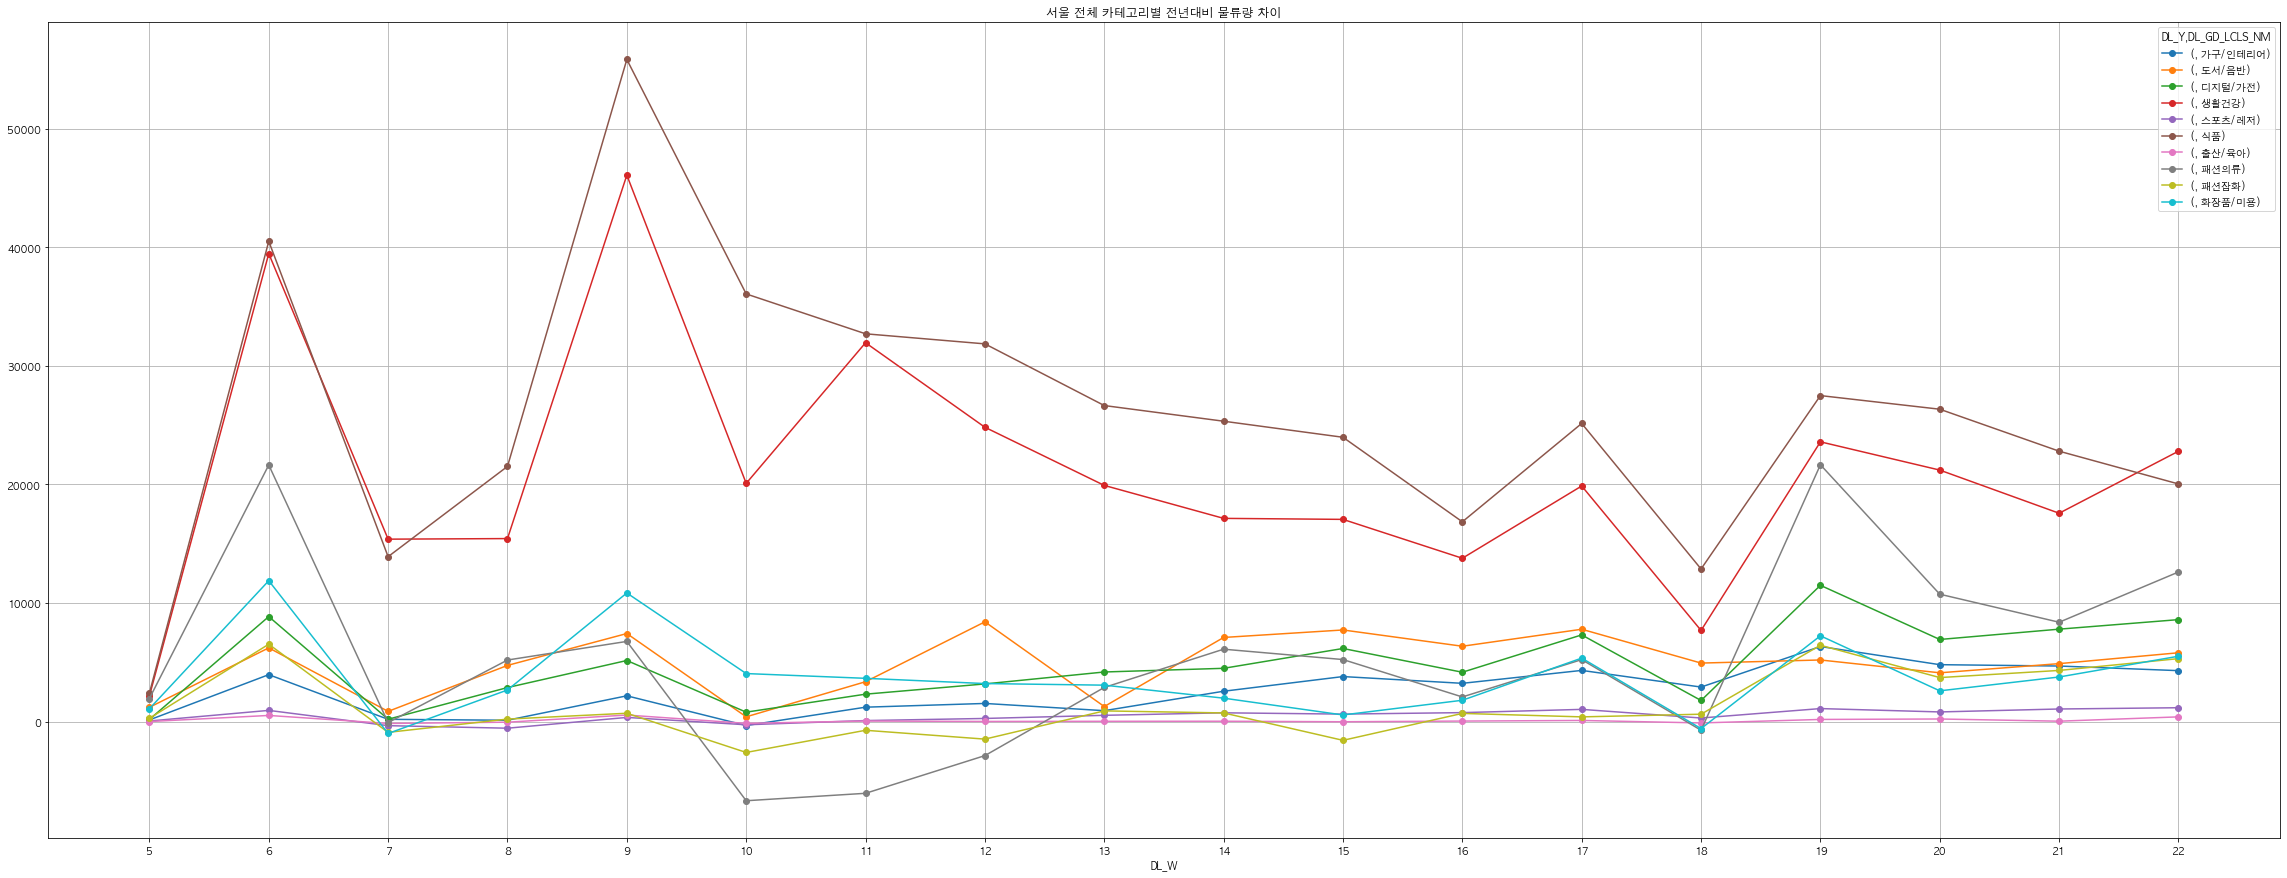

In [13]:
seoul=cjdt_seoul.pivot_table(values=['INVC_CONT'], \
                      index=['DL_Y','DL_W', 'DL_GD_LCLS_NM'], aggfunc='sum')
seoul=seoul.unstack(0)
seoul['seoul_diff']=seoul.iloc[:,1] - seoul.iloc[:,0]
seoul_=seoul.unstack(1)
seoul_['seoul_diff'].plot(figsize=(40,15),grid=True, marker='o')
plt.title('서울 전체 카테고리별 전년대비 물류량 차이')
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

# 서울 중구

([<matplotlib.axis.XTick at 0x7faf261f35b0>,
 <a list of 18 Text major ticklabel objects>)

/Users/zzna/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zzna/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


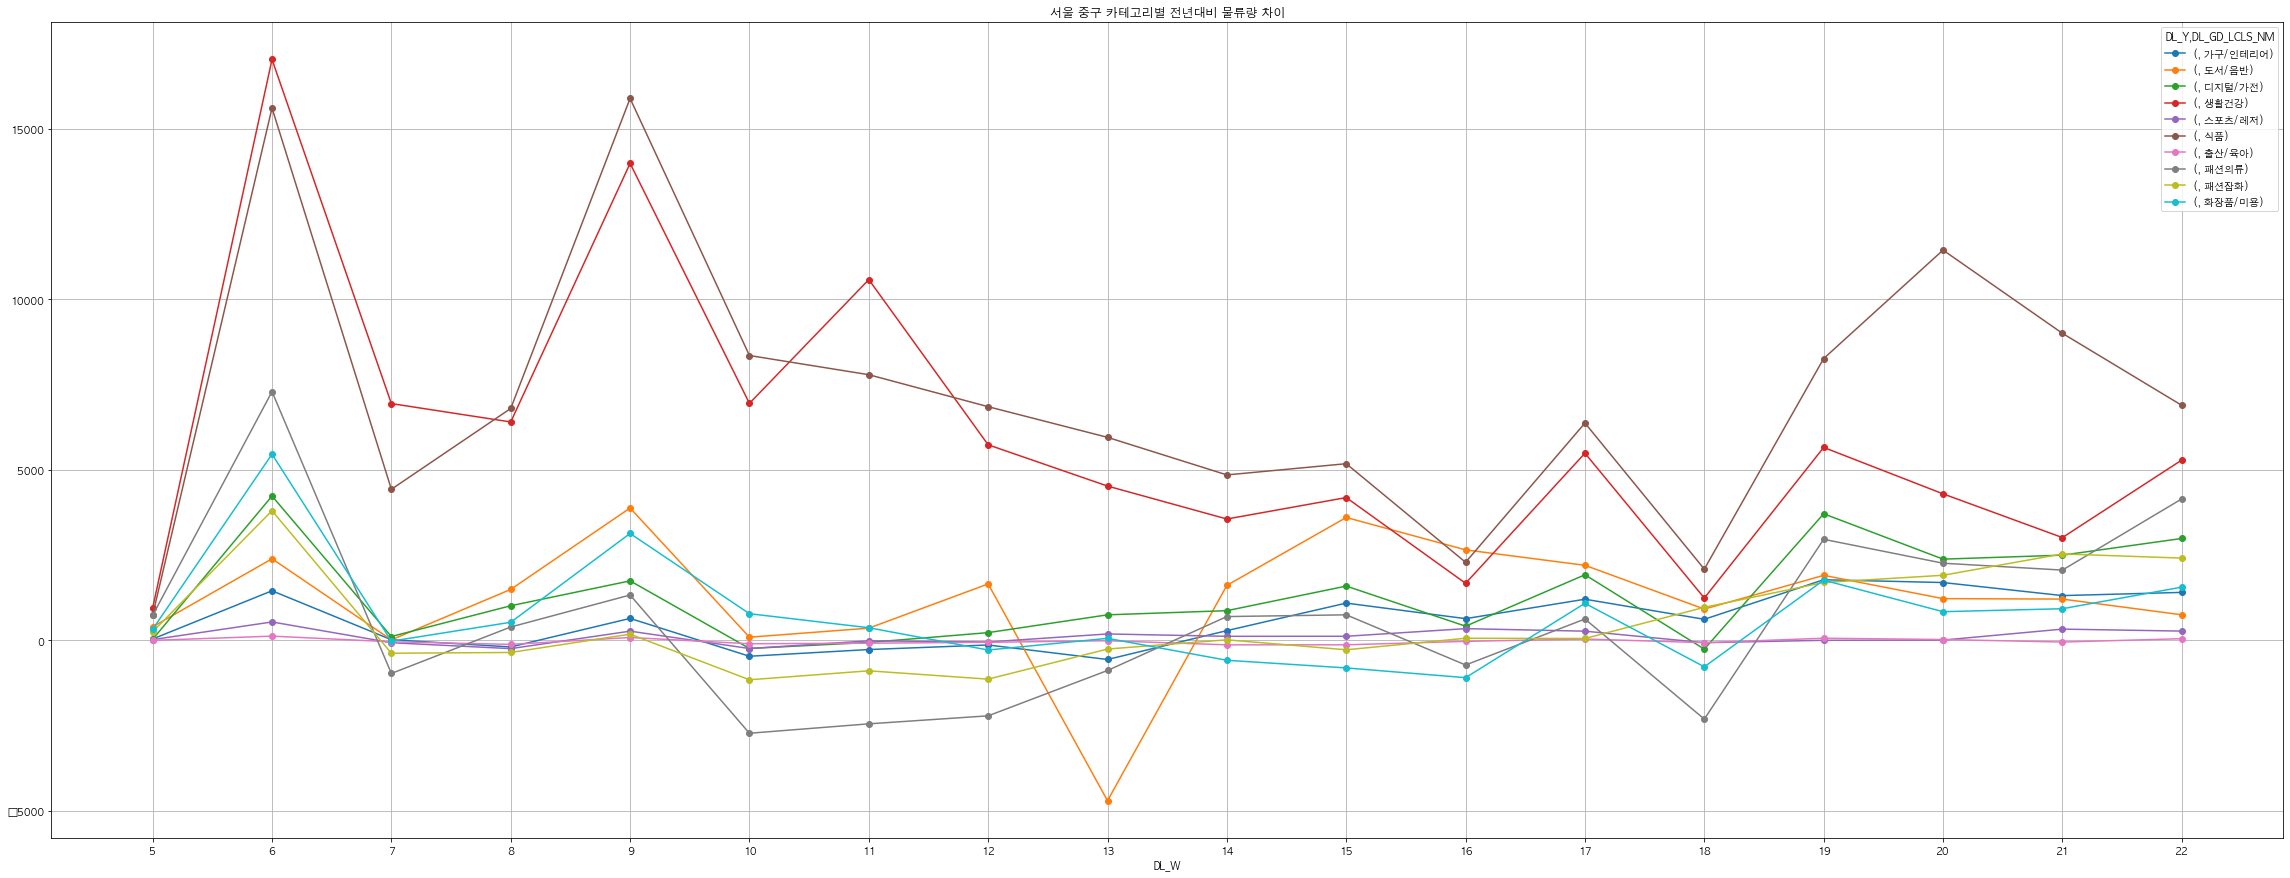

In [14]:
dt10=cjdt_seoul[cjdt_seoul['CTGG_NM']=='중구']
seoul_jg=dt10.pivot_table(values=['INVC_CONT'], \
                             index=['DL_Y','DL_W', 'DL_GD_LCLS_NM'], aggfunc='sum')
seoul_jg=seoul_jg.unstack(0)
seoul_jg['jg_diff']=seoul_jg.iloc[:,1] - seoul_jg.iloc[:,0]
seoul_jg_=seoul_jg.unstack(1)
seoul_jg_['jg_diff'].plot(figsize=(40,15),grid=True, marker='o')
plt.title('서울 중구 카테고리별 전년대비 물류량 차이')
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

# 서울 노원구

([<matplotlib.axis.XTick at 0x7faf2609d190>,
 <a list of 18 Text major ticklabel objects>)

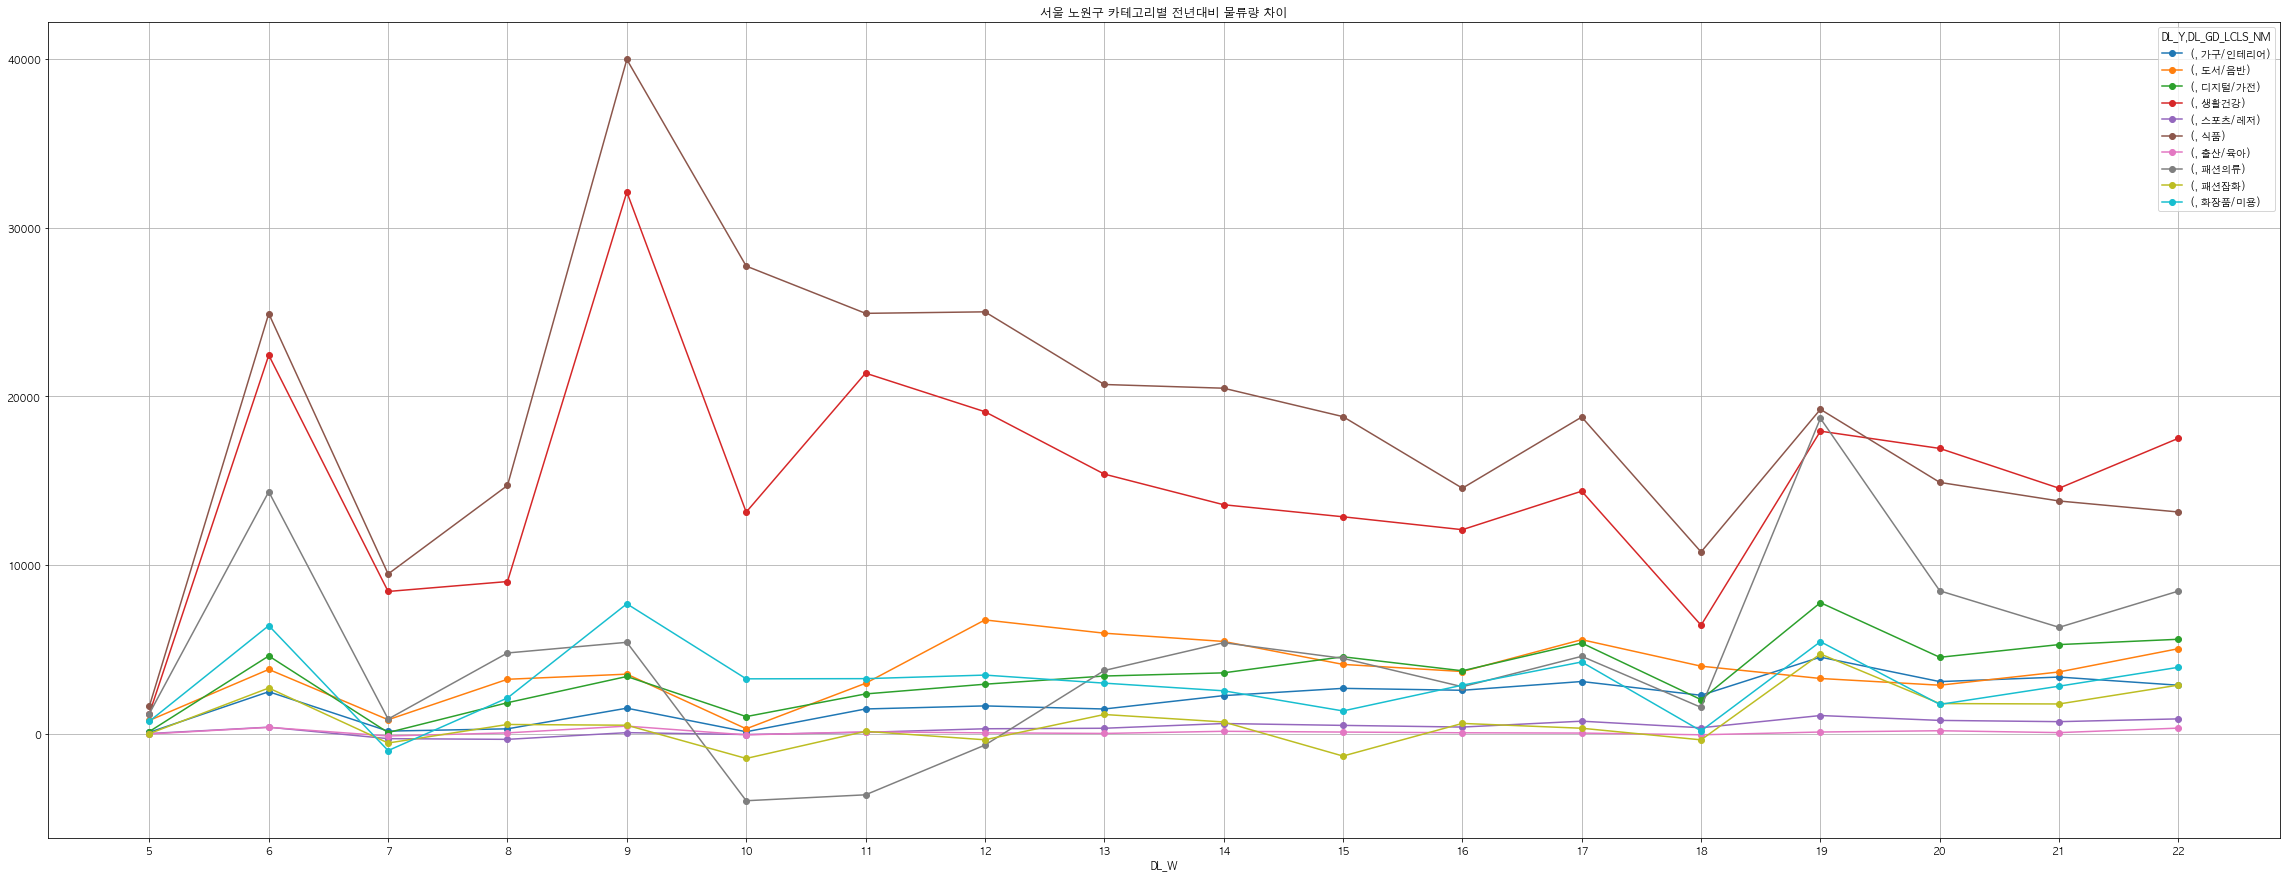

In [15]:
dt11=cjdt_seoul[cjdt_seoul['CTGG_NM']=='노원구']
seoul_nwg=dt11.pivot_table(values=['INVC_CONT'], \
                             index=['DL_Y','DL_W', 'DL_GD_LCLS_NM'], aggfunc='sum')
seoul_nwg=seoul_nwg.unstack(0)
seoul_nwg['nwg_diff']=seoul_nwg.iloc[:,1] - seoul_nwg.iloc[:,0]
seoul_nwg_=seoul_nwg.unstack(1)
seoul_nwg_['nwg_diff'].plot(figsize=(40,15),grid=True, marker='o')
plt.title('서울 노원구 카테고리별 전년대비 물류량 차이')
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

# 대구 전체


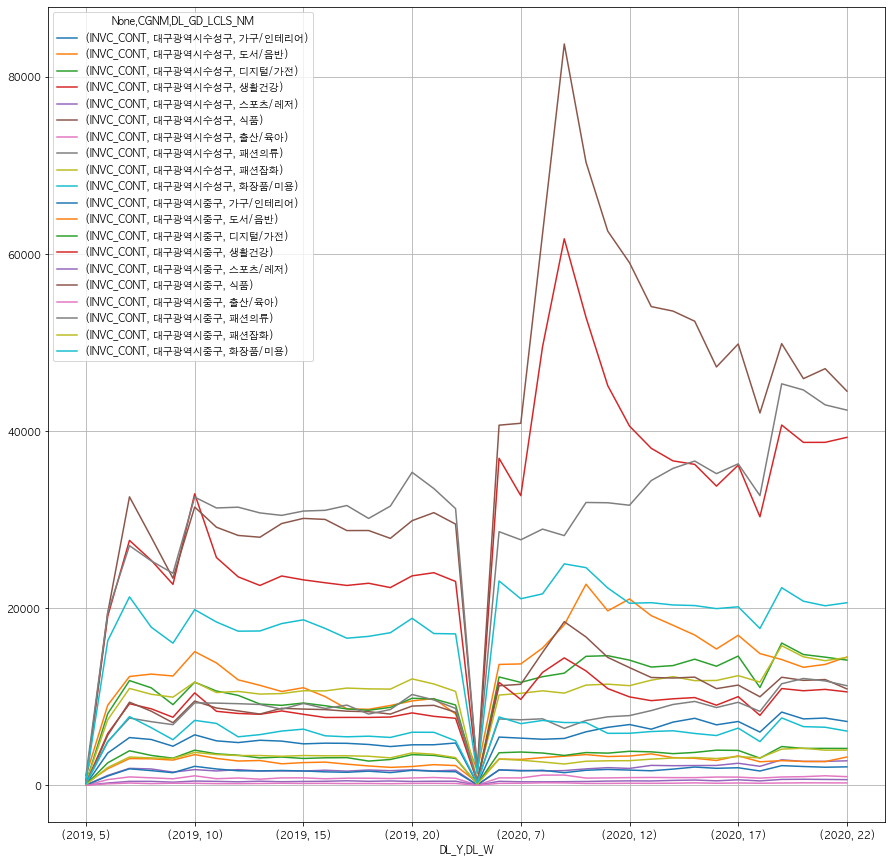

In [16]:
#전체
dt06.plot(figsize=(15,15),grid=True)

([<matplotlib.axis.XTick at 0x7faf27a0e1c0>,
 <a list of 18 Text major ticklabel objects>)

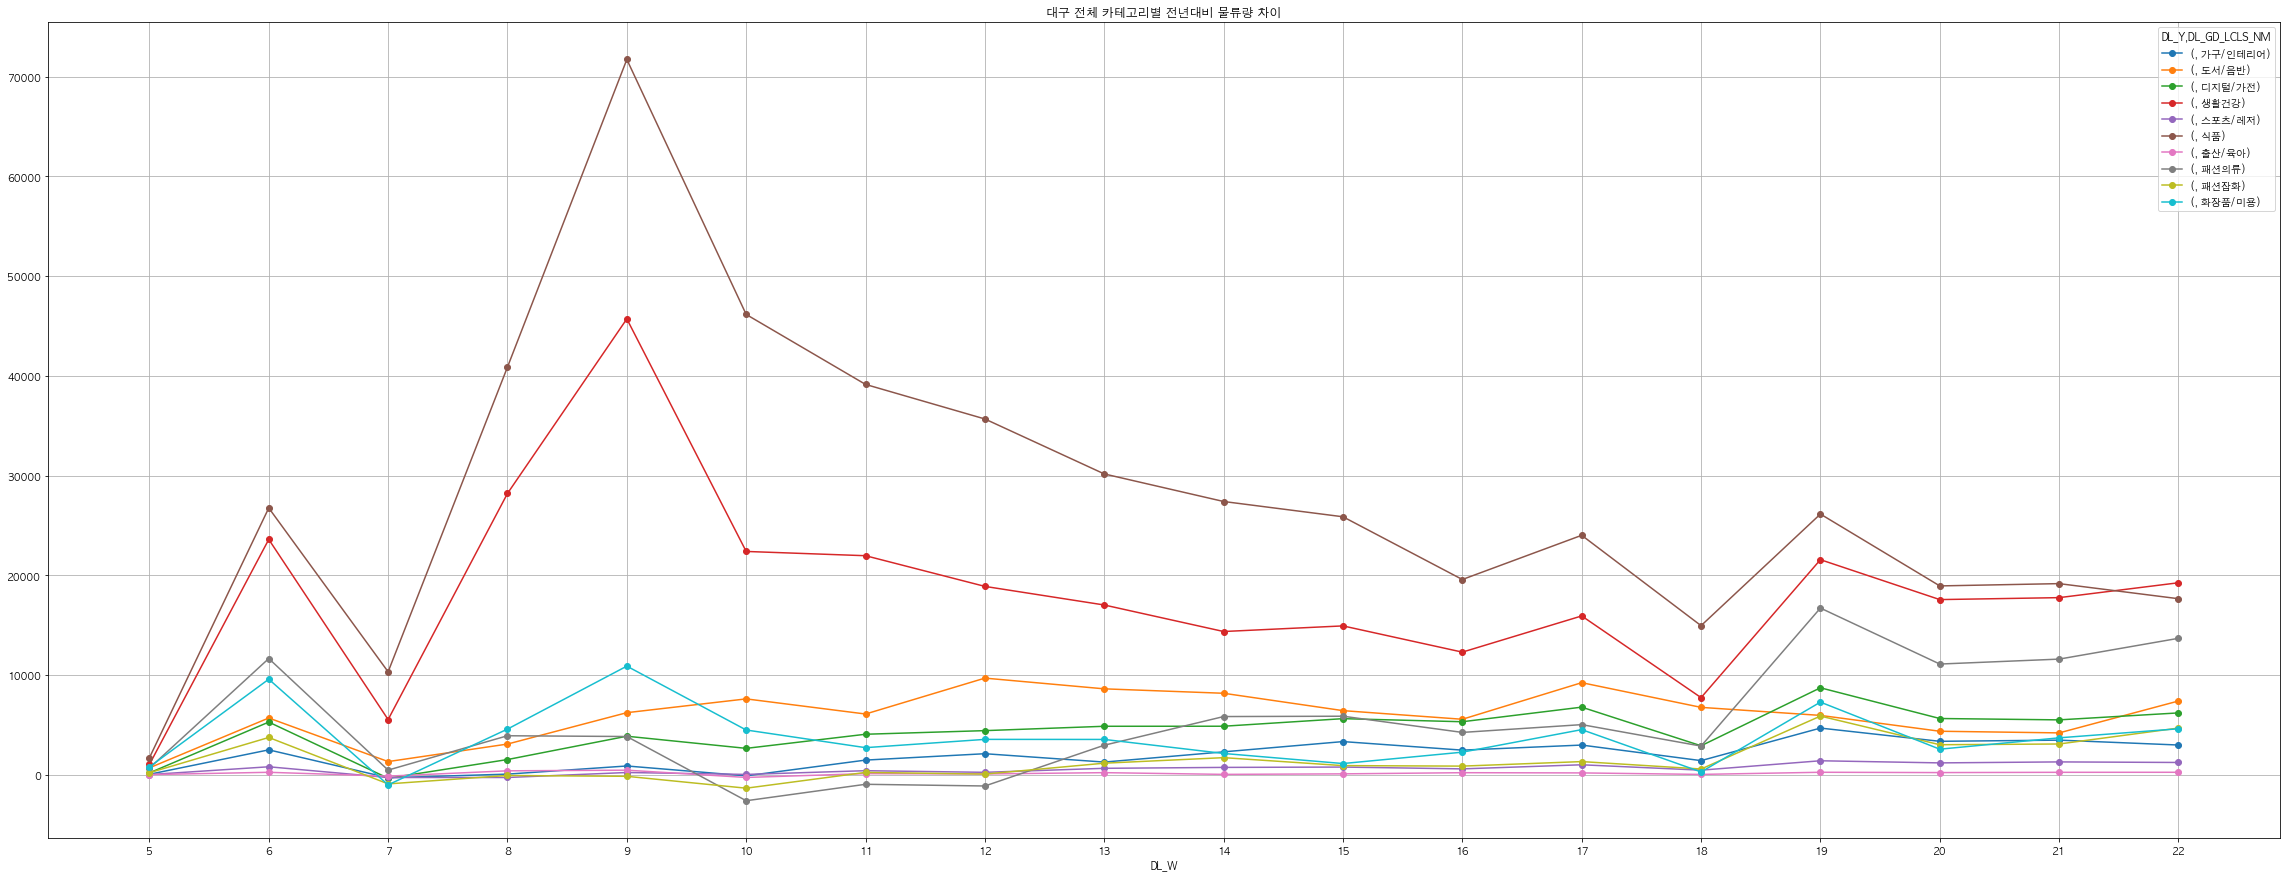

In [17]:
daegu=cjdt_daegu.pivot_table(values=['INVC_CONT'], \
                      index=['DL_Y','DL_W', 'DL_GD_LCLS_NM'], aggfunc='sum')
daegu=daegu.unstack(0)
daegu['daegu_diff']=daegu.iloc[:,1] - daegu.iloc[:,0]
daegu_=daegu.unstack(1)
daegu_['daegu_diff'].plot(figsize=(40,15),grid=True, marker='o')
plt.title('대구 전체 카테고리별 전년대비 물류량 차이')
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])


# 대구 중구

([<matplotlib.axis.XTick at 0x7faf2672f2e0>,
 <a list of 18 Text major ticklabel objects>)

/Users/zzna/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zzna/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


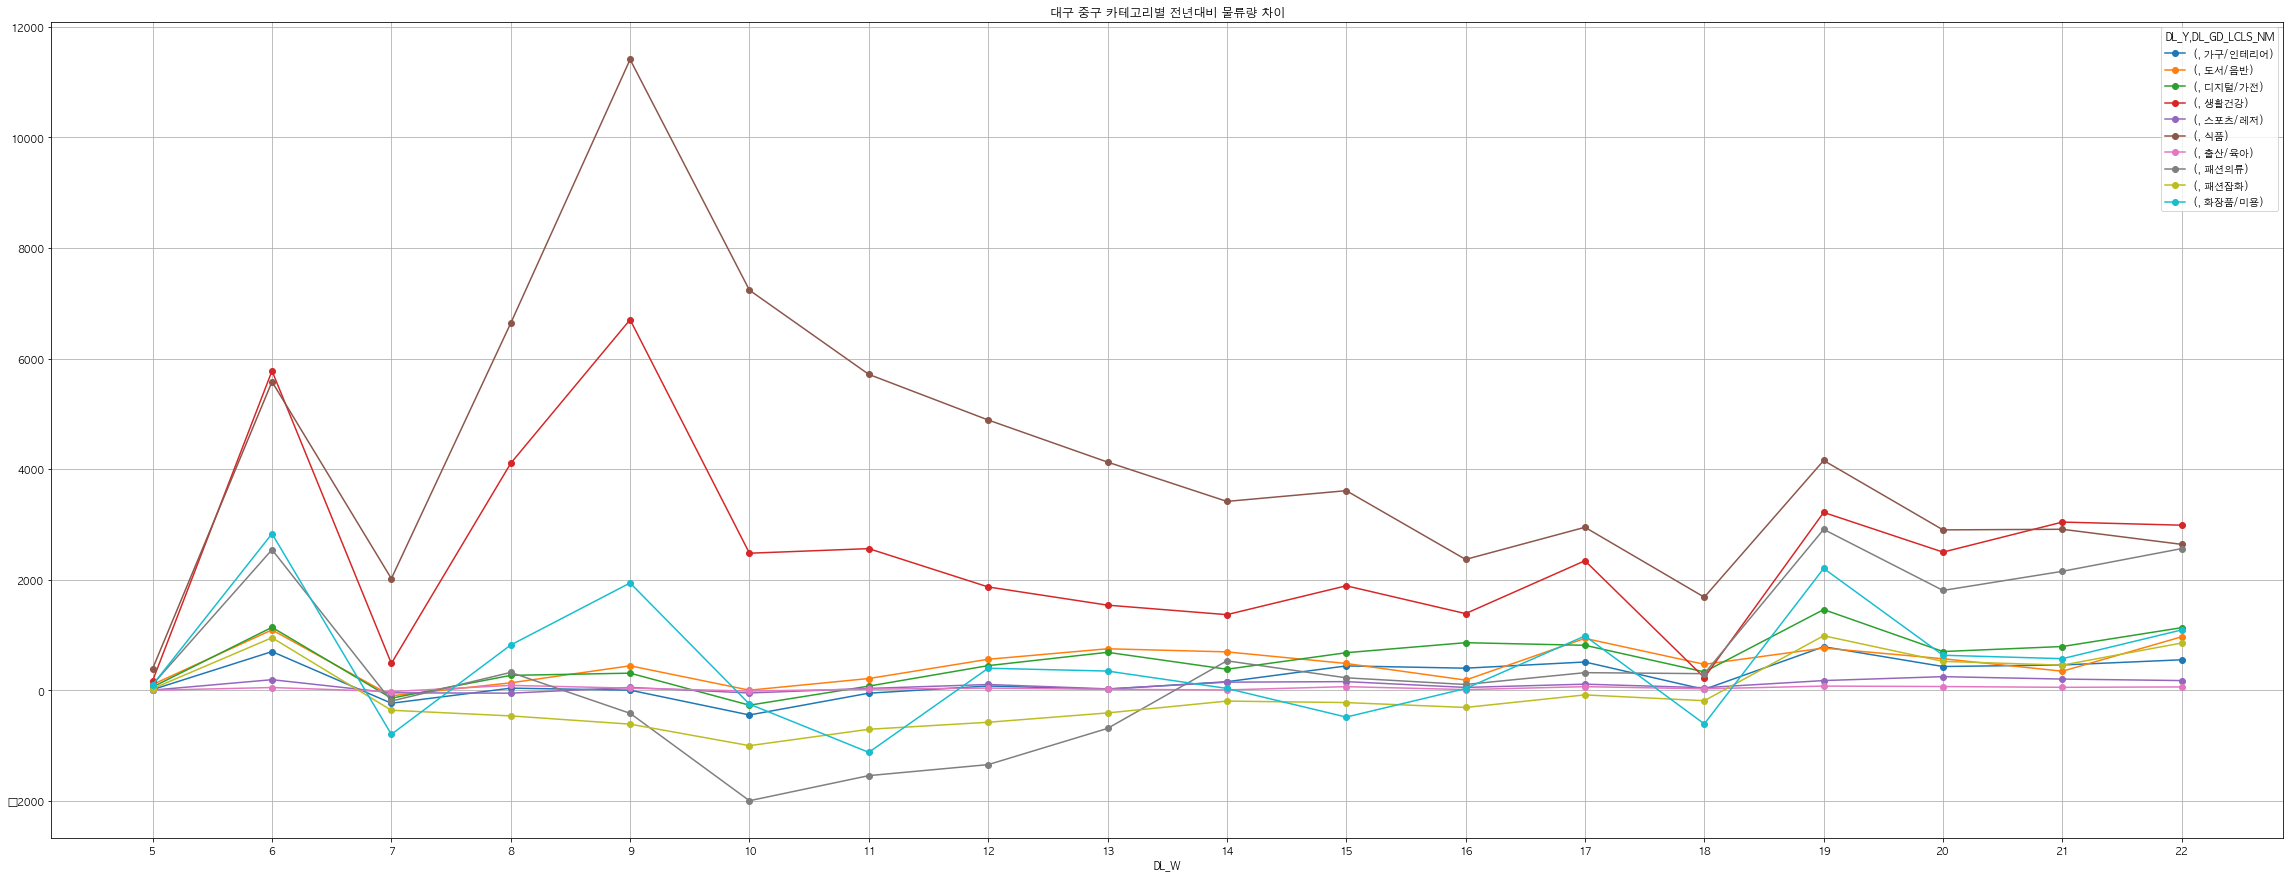

In [18]:
dt12=cjdt_daegu[cjdt_daegu['CTGG_NM']=='중구']
daegu_jg=dt12.pivot_table(values=['INVC_CONT'], \
                             index=['DL_Y','DL_W', 'DL_GD_LCLS_NM'], aggfunc='sum')
daegu_jg=daegu_jg.unstack(0)
daegu_jg['jg_diff']=daegu_jg.iloc[:,1] - daegu_jg.iloc[:,0]
daegu_jg_=daegu_jg.unstack(1)
daegu_jg_['jg_diff'].plot(figsize=(40,15),grid=True, marker='o')
plt.title('대구 중구 카테고리별 전년대비 물류량 차이')
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

# 대구 수성구

([<matplotlib.axis.XTick at 0x7faf279ae070>,
 <a list of 18 Text major ticklabel objects>)

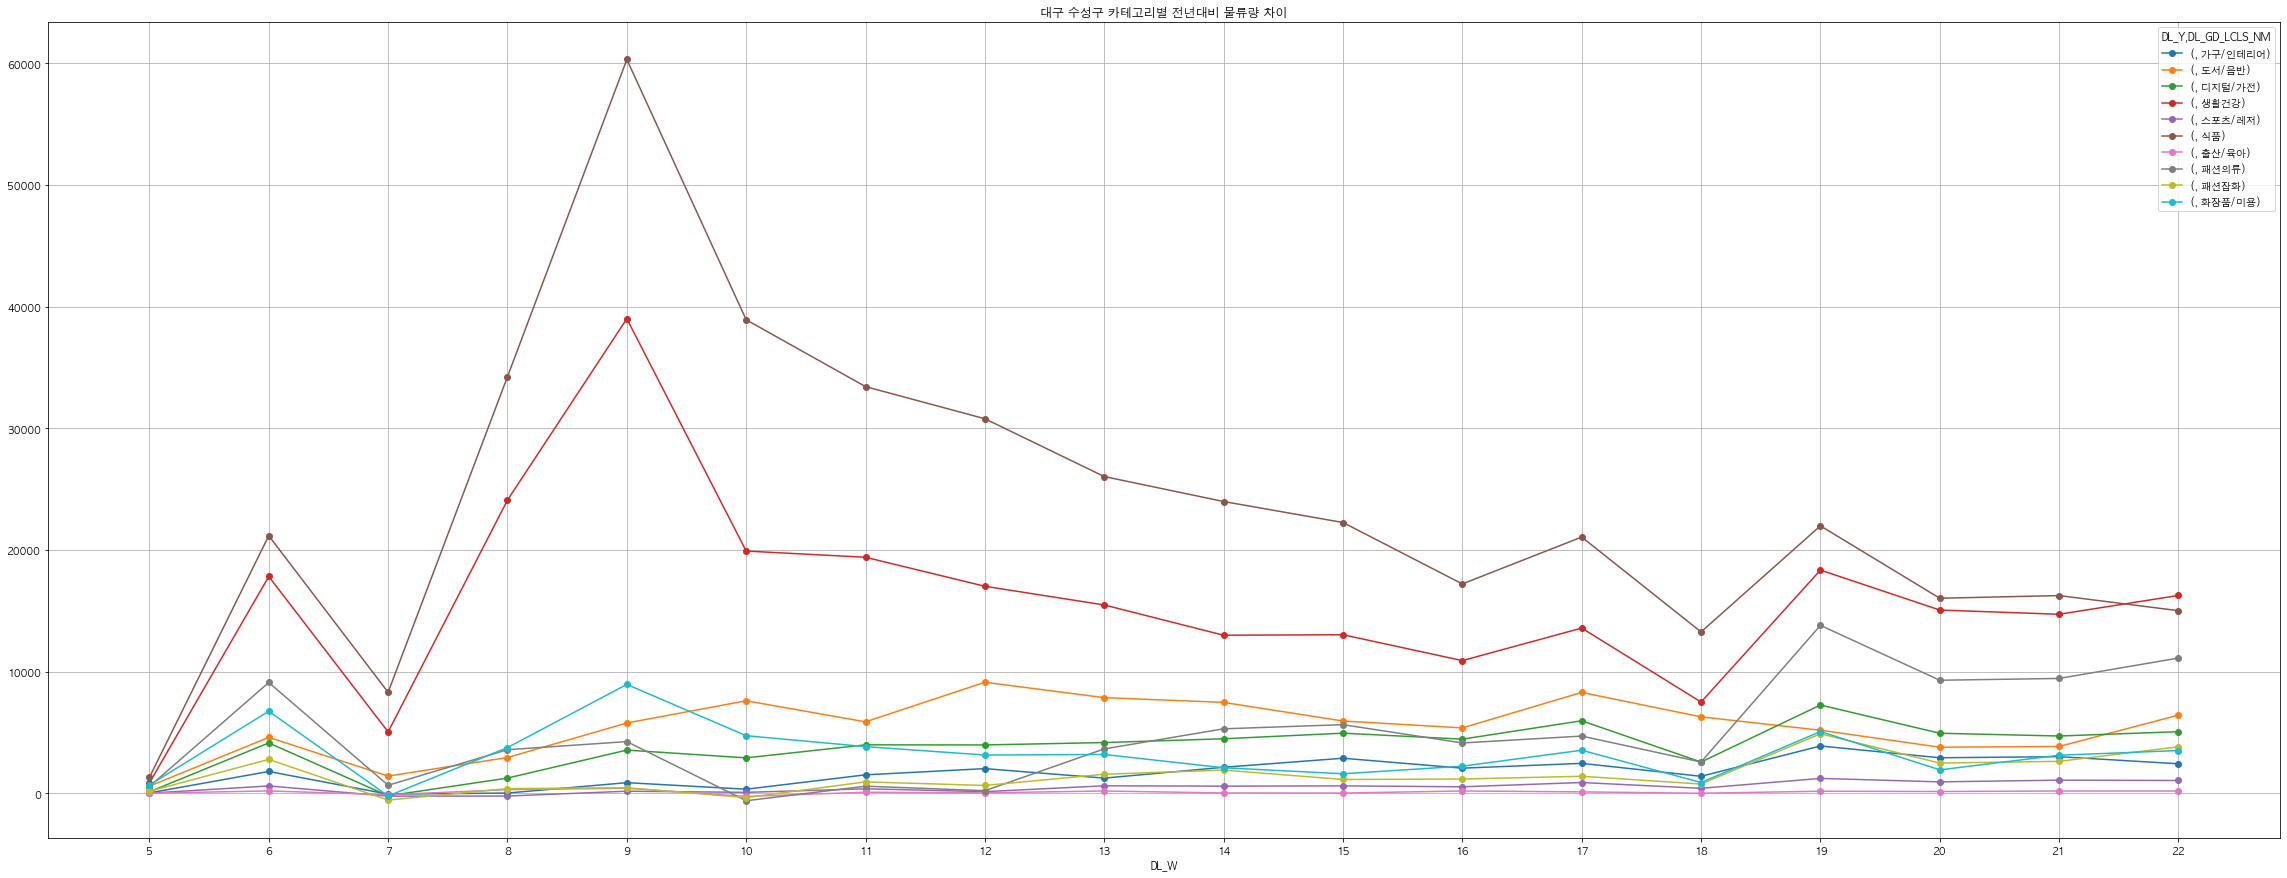

In [19]:
dt13=cjdt_daegu[cjdt_daegu['CTGG_NM']=='수성구']
daegu_ssg=dt13.pivot_table(values=['INVC_CONT'], \
                             index=['DL_Y','DL_W', 'DL_GD_LCLS_NM'], aggfunc='sum')
daegu_ssg=daegu_ssg.unstack(0)
daegu_ssg['ssg_diff']=daegu_ssg.iloc[:,1] - daegu_ssg.iloc[:,0]
daegu_ssg_=daegu_ssg.unstack(1)
daegu_ssg_['ssg_diff'].plot(figsize=(40,15),grid=True, marker='o')
plt.title('대구 수성구 카테고리별 전년대비 물류량 차이')
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

# 지역별 차이는 어떻게 될까

In [20]:
seoul_nwg

INVC_CONT        nwg_diff
DL_Y                    2019   2020         
DL_W DL_GD_LCLS_NM                          
5    가구/인테리어             120    217       97
     도서/음반               787   1589      802
     디지털/가전              384    528      144
     생활건강                634   1845     1211
     스포츠/레저               19     43       24
...                      ...    ...      ...
22   식품                39891  53040    13149
     출산/육아              1081   1426      345
     패션의류              40713  49178     8465
     패션잡화              13532  16426     2894
     화장품/미용            20421  24370     3949

[180 rows x 3 columns]

In [21]:
daegu_local=daegu_jg.drop(['INVC_CONT'],axis=1)
daegu_local['ssg_diff']=daegu_ssg['ssg_diff']
daegu_local = daegu_local.reset_index(drop=False, inplace=False).stack('DL_Y').reset_index() \
.drop(['level_0','DL_Y'], axis='columns')
daegu_local.columns=['카테고리','Week','대구시 중구','대구시 수성구']
daegu_local.set_index('Week',inplace=True)
daegu_local

,카테고리,대구시 중구,대구시 수성구
Week,,,
5,가구/인테리어,13,36
5,도서/음반,105,587
5,디지털/가전,60,128
5,생활건강,174,856
5,스포츠/레저,3,15
...,...,...,...
22,식품,2639,15014
22,출산/육아,61,188
22,패션의류,2563,11120


([<matplotlib.axis.XTick at 0x7faf267bceb0>,
 <a list of 18 Text major ticklabel objects>)

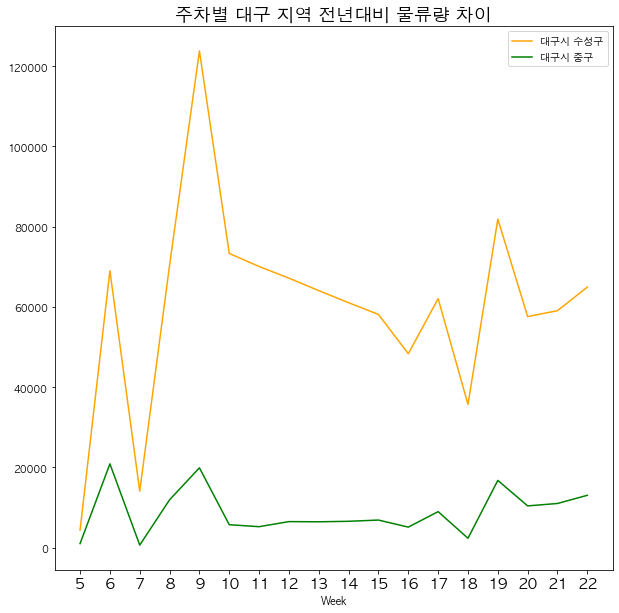

In [22]:
daegu_local.pivot_table(values=['대구시 중구','대구시 수성구'], \
                        index=['Week'], aggfunc='sum'). \
plot(grid=False, figsize=(10,10), color=['orange','g'])
plt.title('주차별 대구 지역 전년대비 물류량 차이',size=18)
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],size=15)

In [23]:
seoul_local=seoul_jg.drop(['INVC_CONT'],axis=1)
seoul_local['nwg_diff']=seoul_nwg['nwg_diff']
seoul_local = seoul_local.reset_index(drop=False, inplace=False).stack('DL_Y').reset_index() \
.drop(['level_0','DL_Y'], axis='columns')
seoul_local.columns=['카테고리','Week','서울시 중구','서울시 노원구']
seoul_local.set_index('Week',inplace=True)

([<matplotlib.axis.XTick at 0x7faf26b55580>,
 <a list of 18 Text major ticklabel objects>)

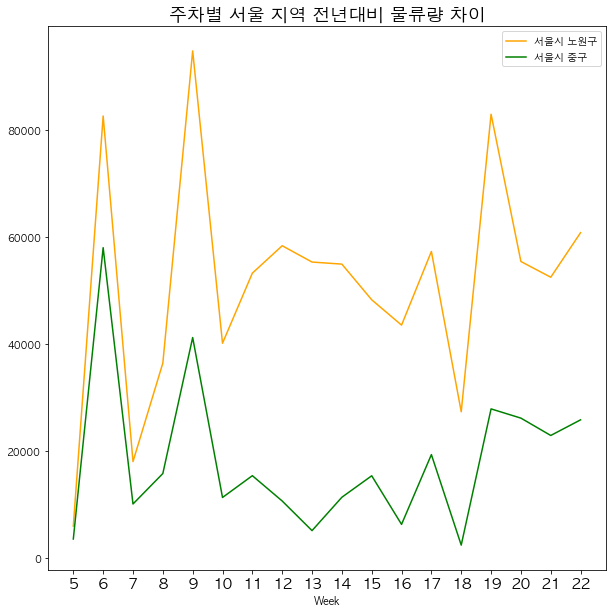

In [24]:
seoul_local.pivot_table(values=['서울시 중구','서울시 노원구'], \
                        index=['Week'], aggfunc='sum'). \
plot(grid=False, figsize=(10,10), color=['orange','g'])
plt.title('주차별 서울 지역 전년대비 물류량 차이',size=18)
plt.xticks([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],size=15)

# 정리

In [25]:
# from IPython.display import Image
# Image('img/0819/cj2nd001.png')

In [26]:
# Image('img/0819/cj2nd002.png')

In [27]:
# Image('img/0819/cj2nd003.png')